In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [30]:
df_list = []
for root, dirs, files in os.walk('/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/models/hyperparameter_training'):
    for name in files:
        file = "{}/{}".format(root,name)     
        if name.endswith(("csv")):
            d = pd.read_csv(file)
            d['lr'] = root.split(",lr=")[1].split("_")[0]
            d['actor_hiddens'] = root.split("actor_hiddens=")[1].split(",c")[0]
            d['critic_hiddens'] = root.split("critic_hiddens=")[1].split(",lr")[0]
            
            df_list.append(d)

training = pd.concat(df_list)
training.head()

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,agent_timesteps_total,done,episodes_total,...,info/last_target_update_ts,info/num_target_updates,perf/cpu_util_percent,perf/ram_util_percent,info/learner/default_policy/mean_q,info/learner/default_policy/max_q,info/learner/default_policy/min_q,lr,actor_hiddens,critic_hiddens
0,-92.284271,-92.284271,-92.284271,2352.0,1,1,2500,2500,False,1,...,2500,1001,58.879000,62.381000,-0.146409,-0.045595,-0.415526,0.023714,"[400, 400]","[300, 300]"
1,-43.874445,-92.284271,-68.079358,2352.0,1,1,5000,5000,False,2,...,5000,3501,63.300873,61.109170,-0.215861,-0.081122,-0.470665,0.023714,"[400, 400]","[300, 300]"
2,-33.453334,-92.284271,-56.537350,2352.0,1,1,7500,7500,False,3,...,7500,6001,73.325397,61.230556,-0.238363,-0.069919,-0.565271,0.023714,"[400, 400]","[300, 300]"
3,-32.538396,-92.284271,-50.537612,2352.0,1,1,10000,10000,False,4,...,10000,8501,78.626592,61.483521,-0.245344,-0.070324,-0.658918,0.023714,"[400, 400]","[300, 300]"
4,-32.538396,-92.284271,-47.795848,2352.0,1,1,12500,12500,False,5,...,12500,11001,82.233588,61.844275,-0.266636,-0.080583,-0.595091,0.023714,"[400, 400]","[300, 300]"


In [31]:
training['lr'] = pd.to_numeric(training['lr'])

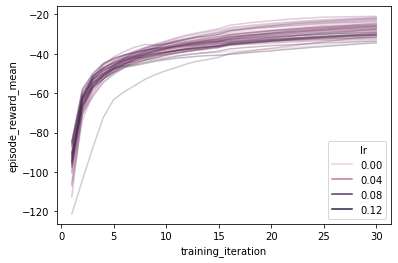

In [32]:
sns.lineplot(data=training, x="training_iteration", y='episode_reward_mean', hue="lr", alpha=0.3)


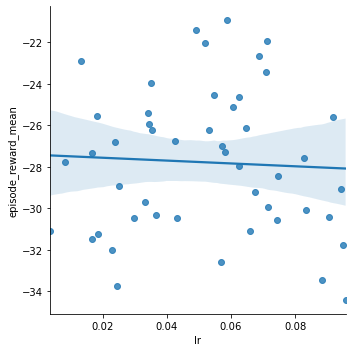

In [33]:
sns.lmplot(data=training[training.training_iteration==30], x="lr", y="episode_reward_mean")

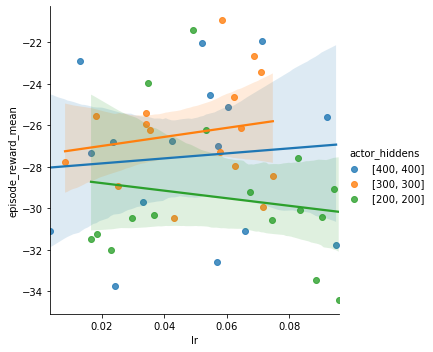

In [34]:
sns.lmplot(data=training[training.training_iteration==30], x="lr", y="episode_reward_mean", hue="actor_hiddens")

In [61]:
training.to_csv("/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/interim/hyperparameter_training.csv")

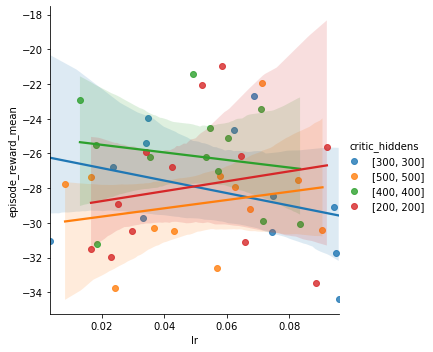

In [35]:
sns.lmplot(data=training[training.training_iteration==30], x="lr", y="episode_reward_mean", hue="critic_hiddens")

In [40]:
table_full = training[training.training_iteration==30][['episode_reward_mean', "lr","actor_hiddens","critic_hiddens"]].sort_values("episode_reward_mean", ascending=False)
table_full = table_full.reset_index().drop(columns="index")
table_full

,episode_reward_mean,lr,actor_hiddens,critic_hiddens
0,-20.950080,0.058617,"[300, 300]","[200, 200]"
1,-21.395531,0.049122,"[200, 200]","[400, 400]"
2,-21.962501,0.071116,"[400, 400]","[500, 500]"
3,-22.034283,0.051978,"[400, 400]","[200, 200]"
4,-22.669262,0.068619,"[300, 300]","[300, 300]"
5,-22.903090,0.013075,"[400, 400]","[400, 400]"
6,-23.450876,0.070963,"[300, 300]","[400, 400]"
7,-23.984314,0.034917,"[200, 200]","[300, 300]"
8,-24.553141,0.054661,"[400, 400]","[400, 400]"
9,-24.656169,0.062368,"[300, 300]","[300, 300]"


In [59]:
table_reduced = table_full.head(8).append(table_full.tail(8))
table_reduced = table_reduced.reset_index()
table_reduced['index'] = table_reduced['index']+1
table_reduced = table_reduced.round(4)
# table_reduced

In [60]:
table_reduced_named = table_reduced.rename(columns={"episode_reward_mean":"Mean episode reward", "actor_hiddens":"Actor hiddens", "critic_hiddens":"Critic hiddens","index":"Rank", "lr":"LR"}).set_index("Rank")
table_reduced_named.to_csv("/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/processed/hyperparameter_tuning.csv")